In [127]:
!pip install tensorflow opencv-python matplotlib

In [128]:
import tensorflow as tf
import os
import cv2

In [129]:
#This setting must be done before any TensorFlow operations that use the GPU to avoid OOM(Out Of Memory) Error
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True) #Tells TensorFlow not to pre-allocate all GPU memory at once, but instead allocate memory incrementally as needed.

In [130]:
from google.colab import drive
drive.mount('/content/drive') # to connect the colab to the drive
valid_exts = ('.png', '.jpg', '.jpeg')
data = "/content/drive/MyDrive/Colab Notebooks/DataSet(YT)"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
for root, dirs, files in os.walk(data):#os.walk walkthrought the root(DataSets),dir (subfolder inside Datasets (Happy,sad_people)) and files are the images inside the happy folder
    for file in files:#looping through every images
        if file.lower().endswith(valid_exts):#allowing only the image wiht extention .png , .jpg , .jpeg
            file_path = os.path.join(root, file)#finding the path of each images in the happyfoler
            image = cv2.imread(file_path)#reading the images

            if image is None:
                print(f"❌ Failed to load {file_path}")
                continue

            print(f"✅ Loaded {file_path} | Shape: {image.shape}")

✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/images18.jpg | Shape: (198, 254, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/image11.jpeg | Shape: (100, 100, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/images10.jpg | Shape: (168, 300, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg | Shape: (733, 1000, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/image10.jpeg | Shape: (100, 100, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/A_Sep20_14_1189155141.jpg | Shape: (675, 1200, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/happy-people-702x336.jpg | Shape: (336, 702, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg | Shape: (64, 64, 3)
✅ Loaded /content/drive/MyDrive/Colab Notebooks/DataSet(YT)/happy/maxresd

In [132]:
data = tf.keras.utils.image_dataset_from_directory(data)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 305 files belonging to 2 classes.


In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/DataSet(YT)') #Loads images as a TensorFlow dataset from the DataSets Folder.
size = len(data)

Found 305 files belonging to 2 classes.


In [135]:
data = data.map(lambda x, y: (x / 255.0, y)).ignore_errors() #Scales image pixel values from [0, 255] to [0, 1]

In [136]:
scaled_iterator = data.as_numpy_iterator()

In [137]:
batch = next(scaled_iterator)

In [138]:
train_size = int(size*.7)
val_size = int(size*.2)
test_size = int(size*.1)

In [139]:
train = data.take(train_size) # take first four batch
val = data.skip(train_size).take(val_size) # skip first 4 batch and take next 2 batch
test = data.skip(train_size+val_size).take(test_size) # skip fist 6 batch and take last 1 batch

In [140]:
from tensorflow.keras.models import Sequential #Importing the Sequntial model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten #importing the necessary layers

In [141]:
model = Sequential()

In [142]:
#Building Convolutional Neural Network (CNN) for binary image classification
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3))) #Detects Image Pattern , 16 filter of size 3x3 and stride = 1 moves 1 pixel at a time and input image size 256x256 RGB
model.add(MaxPooling2D()) # Reduce size by 2 , extract dominant feature , speed up training and prevent over fitting

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # Converts the 2D feature maps into a 1D vector and Prepares for fully connected (dense) layers.

model.add(Dense(256,activation='relu')) #Fully connected layer with 256 neurons and learn global combination features
model.add(Dense(1,activation='sigmoid'))#Final output layer wiht 1 neuron for the binary classifiation and sigmiod activation funtion to give ouput between 0 and 1.

In [143]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
# adam : optimizer to adjust weights in the neural network to reduce loss
# BinaryCrossentropy : Calculate loss in Binary classification model

In [144]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [145]:
logsdir = 'logs'

In [146]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir)

In [147]:
hist = model.fit(train,epochs=20,validation_data = val,callbacks=[tensorboard_callback])

Epoch 1/20
      7/Unknown 25s 2s/step - accuracy: 0.5259 - loss: 0.8570

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5266 - loss: 0.8487 - val_accuracy: 0.7500 - val_loss: 0.6705
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7340 - loss: 0.6351 - val_accuracy: 0.5625 - val_loss: 0.6869
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6779 - loss: 0.6347 - val_accuracy: 0.8125 - val_loss: 0.5134
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.8328 - loss: 0.5189 - val_accuracy: 0.8281 - val_loss: 0.4146
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8502 - loss: 0.3490 - val_accuracy: 0.7188 - val_loss: 0.4204
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7695 - loss: 0.4394 - val_accuracy: 0.9688 - val_loss: 0.2715
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9299 - loss: 0.2831 - val_accuracy: 0.9531 - val_loss: 0.1860
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9312 - loss: 0.1585 - val_accuracy: 0.7969 - val_loss: 0.3589
Epoch 9/20
7/7 ━━━━

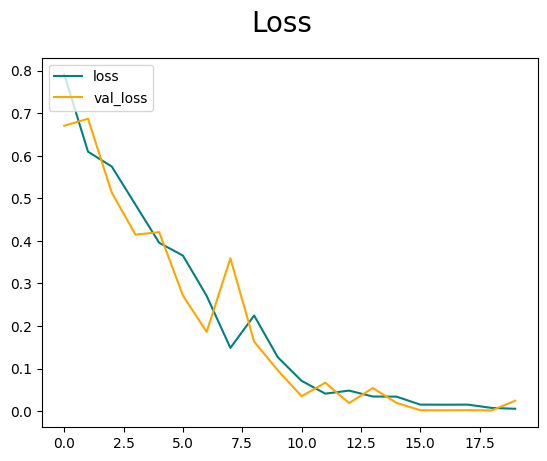

In [148]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

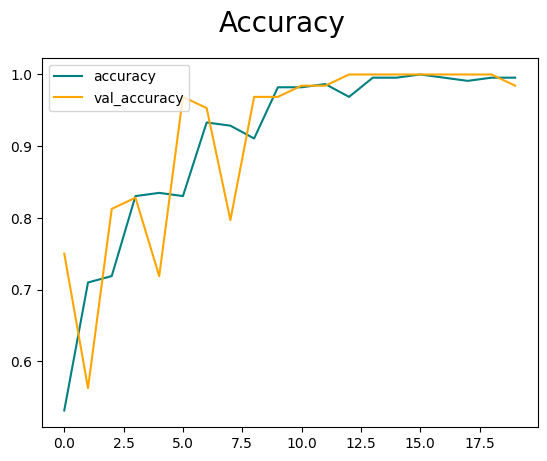

In [149]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [150]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [151]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [152]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [153]:
print(f"Presion:{pre.result()} , Reacall:{re.result()} , Accuracy:{acc.result()}")

Presion:1.0 , Reacall:1.0 , Accuracy:1.0


In [154]:
import cv2

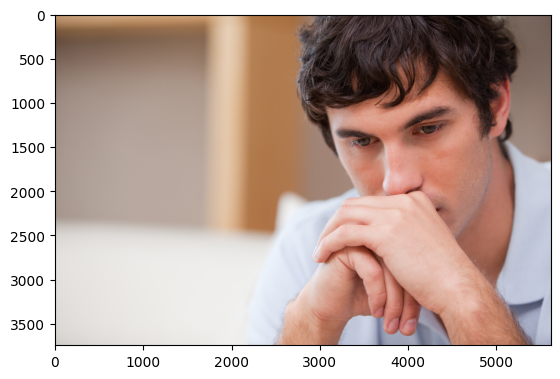

In [155]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/8iAb9k4aT.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

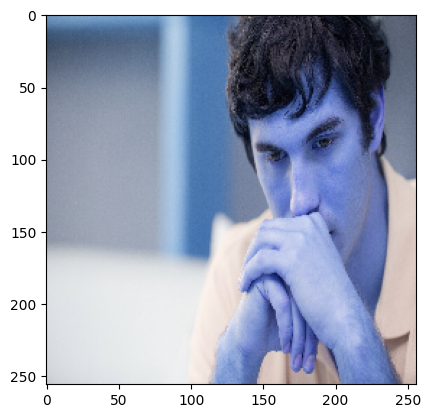

In [156]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [157]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


In [158]:
yhat

array([[0.9863381]], dtype=float32)

In [159]:
if yhat > 0.5:
  print('The image is an Sad Image')
else:
  print('The image is an Happy Image')

The image is an Sad Image


In [162]:
from tensorflow.keras.models import load_model

In [164]:
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks','Happy_Sad_Classifier.h5'))

In [165]:
new_model = load_model(os.path.join('/content/drive/MyDrive/Colab Notebooks','Happy_Sad_Classifier.h5'))

In [167]:
newyhat = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [168]:
if newyhat > 0.5:
  print('The image is an Sad Image')
else:
  print('The image is an Happy Image')

The image is an Sad Image
